# **Import libraries**

In [60]:
import pandas as pd
import numpy as np
import scipy
import scipy.sparse as sps
import matplotlib.pyplot as plt
import louvain
import igraph as ig
import time
import pickle

In [61]:
from bertopic import BERTopic

# **Load functions for probability matrices**

In [62]:
#%run ../labs/communities_mod.py

In [63]:
%run "communities_mod.ipynb"

bertopic 1.11
softlouvain v1.10


# **Assign documents to topics using BERTopic**
i.e., run BERTopic detection on superficially cleaned text

In [64]:
# load text

df2 = pd.read_excel("../0_data/silver/7_text_clean_short.xlsx")
df2['id'] = np.arange(1, len(df2) + 1)
df2["id"] = np.array([str(i) for i in df2["id"]])
df2['hashtags'] = ''

# remove those documents that do not appear in Pcc
documents = np.array([str(i) for i in documents])
df2 = df2.loc[df2['id'].isin(documents)]
df2.index = np.array(range(len(df2)))

# workaround to reinsert hashtags (if any) in the cleaned text
df2["text_deep_clean2"] = [str(df2["text_deep_clean"][i]) + " #" +
                           df2["hashtags"][i][2:-2].replace("', '"," #")
                           for i in range(len(df2))]

In [65]:
# start a time counter
tic = time.time()

# prepare a BERTopic instance
bert_model = BERTopic()

# run BERTopic
docs = list(df2["post_dir"])
topics, probabilities = bert_model.fit_transform(docs)

# reduce the number of topics only in case it is needed!
# topics = bert_model.reduce_outliers(docs, topics)

# function to map the topis into a community assignment matrix C
# where rows represent documents, and columns represent topics
def topics_to_C(topics):
  # extract community assignments
  C = sps.csr_matrix((len(topics),max(topics)+2))
  for i in range(C.shape[1]):
    C[np.array(topics)==(i-1),i] = 1
  # remove zero assignments
  C = C[:,np.unique(scipy.sparse.find(C)[1])]
  return C

# map the topics into a community assignment matrix C
C_b = topics_to_C(topics)

# capture execution time
et_bert = time.time()-tic

C:\Users\danie\anaconda3\envs\ds_master\Lib\site-packages\scipy\sparse\_index.py:143: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



# **Evaluate NMI, modulartity, Ncut, and Infomap metrics**

# **Visualize the result using BERTopic tools**

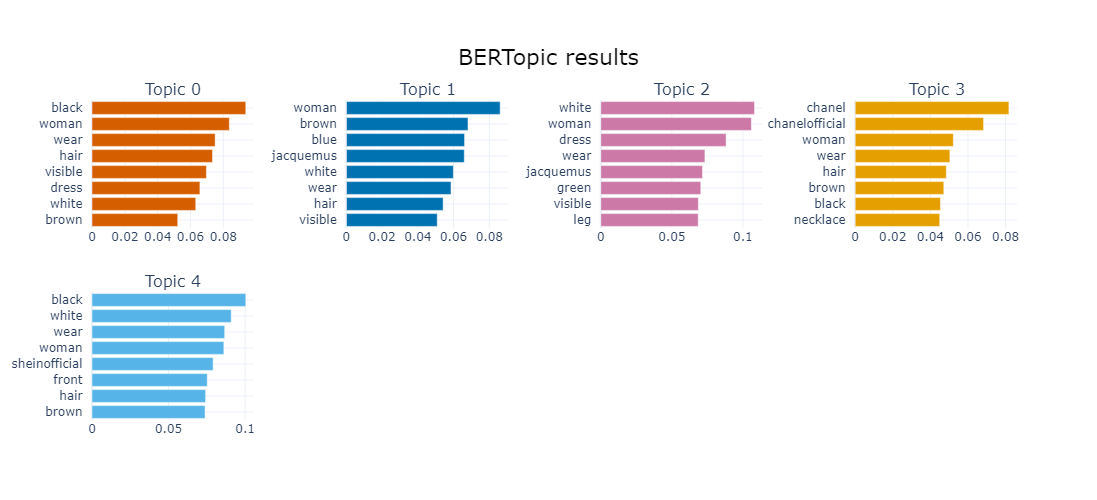

In [66]:
# BERTopic second

# use the clean text in order to get a more meaningful description
docs = list(df2["text_deep_clean"])
bert_model2 = bertopic_overwrite(bert_model,docs,C_b)

# visualize topic description
bert_model2.visualize_barchart(topics = range(C_b.shape[1]),
                               n_words = 8,
                               title = "BERTopic results")

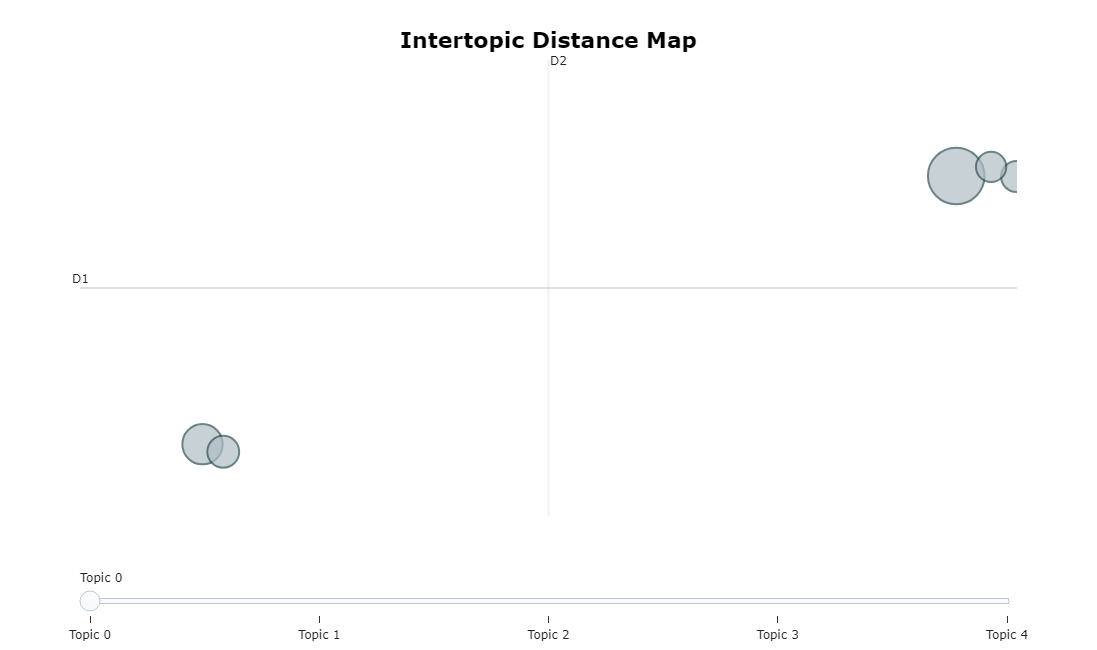

In [67]:
bert_model2.visualize_topics()